<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.size'] = 14

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
def convert(x):
    if x.isnumeric():
        return int(x)
    else:
        return str(x)

In [3]:
import csv

data = {}
with open('sat_scores.csv', newline='') as sat_file:
    reader = csv.DictReader(sat_file)
    for i, row in enumerate(reader):
        for col in row.keys():
            if i == 0:
                data[col] = [convert(row[col])]
            else:
                data[col].append(convert(row[col]))
       

In [4]:
# print first 5 entries of each key
pprint({k: data[k][:5] for k in data})

{'Math': [510, 513, 515, 505, 516],
 'Rate': [82, 81, 79, 77, 72],
 'State': ['CT', 'NJ', 'MA', 'NY', 'NH'],
 'Verbal': [509, 499, 511, 495, 520]}


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
sat_scores_from_dict = pd.DataFrame(data)

In [6]:
sat_scores = pd.read_csv('sat_scores.csv')

In [7]:
print(sat_scores_from_dict.dtypes)

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


In [8]:
print(sat_scores.dtypes)

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
feature_names = list(sat_scores.columns)
feature_names

['State', 'Rate', 'Verbal', 'Math']

In [11]:
# data = [list(sat_scores[col]) for col in sat_scores.columns]
data = np.array(sat_scores)
data[:5]

array([['CT', 82, 509, 510],
       ['NJ', 81, 499, 513],
       ['MA', 79, 511, 515],
       ['NY', 77, 495, 505],
       ['NH', 72, 520, 516]], dtype=object)

In [12]:
description = """SAT Scores (standardized college admissions test):

:Description: The score range for the SAT is 400-1600. It's the sum on the 
              Evidence-Based Reading and Writing (ERW) section and the Math section, 
              which each have a score range of 200-800.
:Number of Instances: {instance}
:Number of Attributes: {attr}
:Attribute Information (in order):
    - State     US states (abbreviations)
    - Rate      Rate in previous school (1 is the best)
    - Verbal    Verbal score
    - Math      Math score
""".format(instance=len(data[0]), attr=len(data))

In [13]:
print(description)

SAT Scores (standardized college admissions test):

:Description: The score range for the SAT is 400-1600. It's the sum on the 
              Evidence-Based Reading and Writing (ERW) section and the Math section, 
              which each have a score range of 200-800.
:Number of Instances: 4
:Number of Attributes: 52
:Attribute Information (in order):
    - State     US states (abbreviations)
    - Rate      Rate in previous school (1 is the best)
    - Verbal    Verbal score
    - Math      Math score



In [14]:
import os

# filename = os.path.dirname(os.getcwd()) + '/EDA/sat_scores.csv'
filename = 'https://github.com/androi7/ds-mini-projects/tree/main/EDA/sat_scores.csv'

In [15]:
sat_scores = {'data': data, 'description': description, 'feature_names': feature_names, 'filename': filename}

In [16]:
# print only the first five rows of the data key
pprint({k: sat_scores[k][:5] if k == 'data' else sat_scores[k] for k in sat_scores})

{'data': array([['CT', 82, 509, 510],
       ['NJ', 81, 499, 513],
       ['MA', 79, 511, 515],
       ['NY', 77, 495, 505],
       ['NH', 72, 520, 516]], dtype=object),
 'description': 'SAT Scores (standardized college admissions test):\n'
                '\n'
                ":Description: The score range for the SAT is 400-1600. It's "
                'the sum on the \n'
                '              Evidence-Based Reading and Writing (ERW) '
                'section and the Math section, \n'
                '              which each have a score range of 200-800.\n'
                ':Number of Instances: 4\n'
                ':Number of Attributes: 52\n'
                ':Attribute Information (in order):\n'
                '    - State     US states (abbreviations)\n'
                '    - Rate      Rate in previous school (1 is the best)\n'
                '    - Verbal    Verbal score\n'
                '    - Math      Math score\n',
 'feature_names': ['State', 'Rate', 'Verba

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [17]:
sat_scores = pd.DataFrame(data=sat_scores['data'], columns=sat_scores['feature_names'])
sat_scores.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [18]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     object
 2   Verbal  52 non-null     object
 3   Math    52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [19]:
# def convert(x, dtype):
#     try:
#         return dtype(x)
#     except:
#         return np.nan

In [20]:
sat_scores = sat_scores.astype({'Rate': 'int32', 'Verbal': 'int32', 'Math': 'int32'})
sat_scores.dtypes

State     object
Rate       int32
Verbal     int32
Math       int32
dtype: object

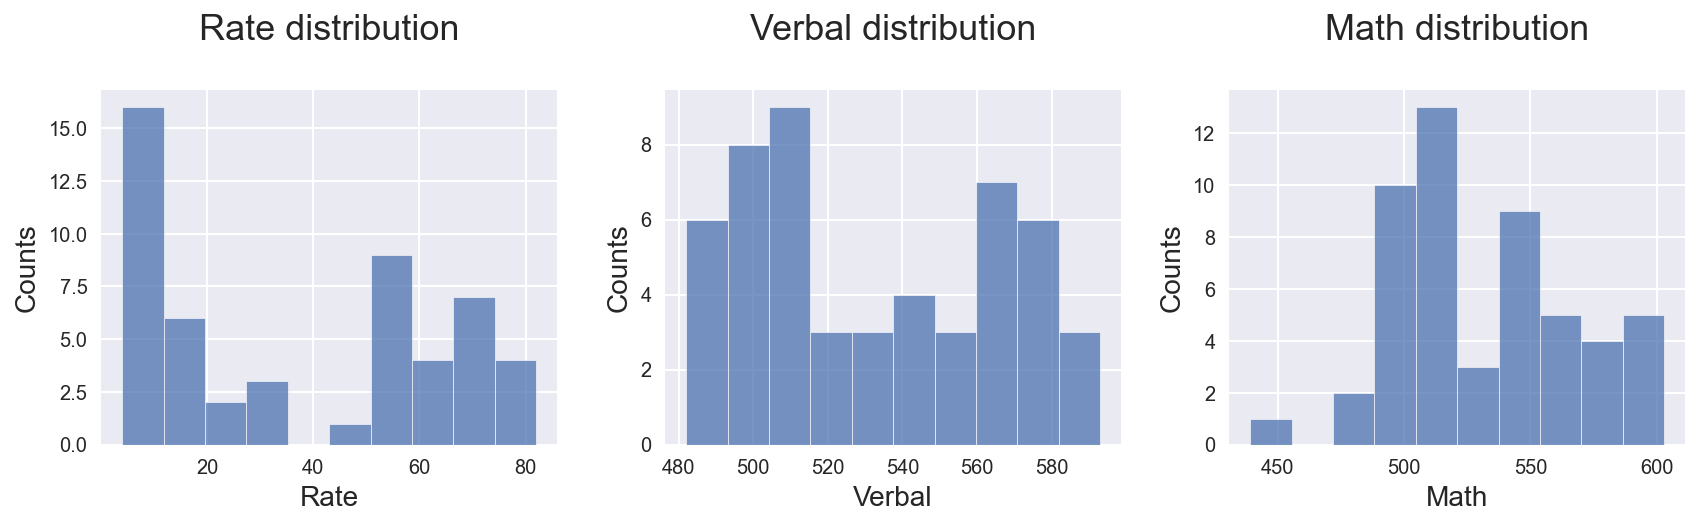

In [21]:
import seaborn as sns
sns.set(font_scale=1.5)
plt.style.use('seaborn')
plt.rcParams['axes.labelsize'] = 14

fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

# distplot is deprecated soon
g = sns.histplot(sat_scores.Rate, kde=False, bins=10, ax=ax[0])
ax[0].set_title('Rate distribution\n', fontsize=18)
ax[0].set_ylabel('Counts')
sns.histplot(sat_scores.Verbal, kde=False, bins=10, ax=ax[1])
ax[1].set_title('Verbal distribution\n', fontsize=18)
ax[1].set_ylabel('Counts')
sns.histplot(sat_scores.Math, kde=False, bins=10, ax=ax[2])
ax[2].set_title('Math distribution\n', fontsize=18)
ax[2].set_ylabel('Counts')
fig.tight_layout(pad=1)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

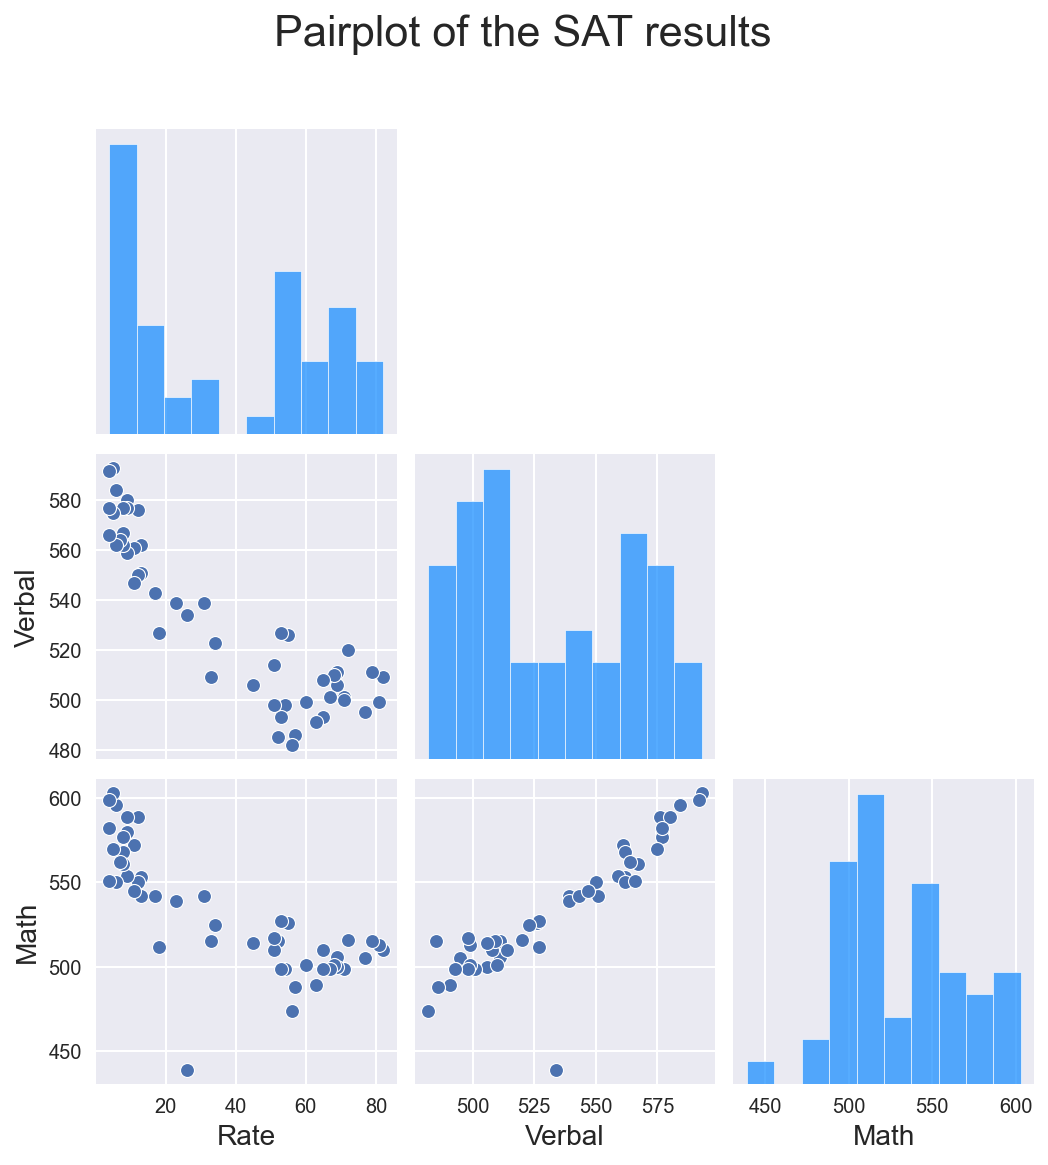

In [22]:
g = sns.pairplot(sat_scores, corner=True, diag_kws={'bins': 10, 'color': 'dodgerblue'})
g.fig.suptitle('Pairplot of the SAT results', y=1.08)
plt.show()

The pairplot depicts a histogram plot on the diagonal (univariate distribution) where the variables on the x- and y-axis are the same and it shows a scatter plot where the variables are different.

Furthermore, the *Verbal* assignment is strong negative correlated to the SAT *Rate*, because the *Verbal* is also strong positive correlated to the *Math* score. Which means that students who gain good results in the reading and writing section also have a well understanding in math. The same relation applies to the under end of the score range and everything in between.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

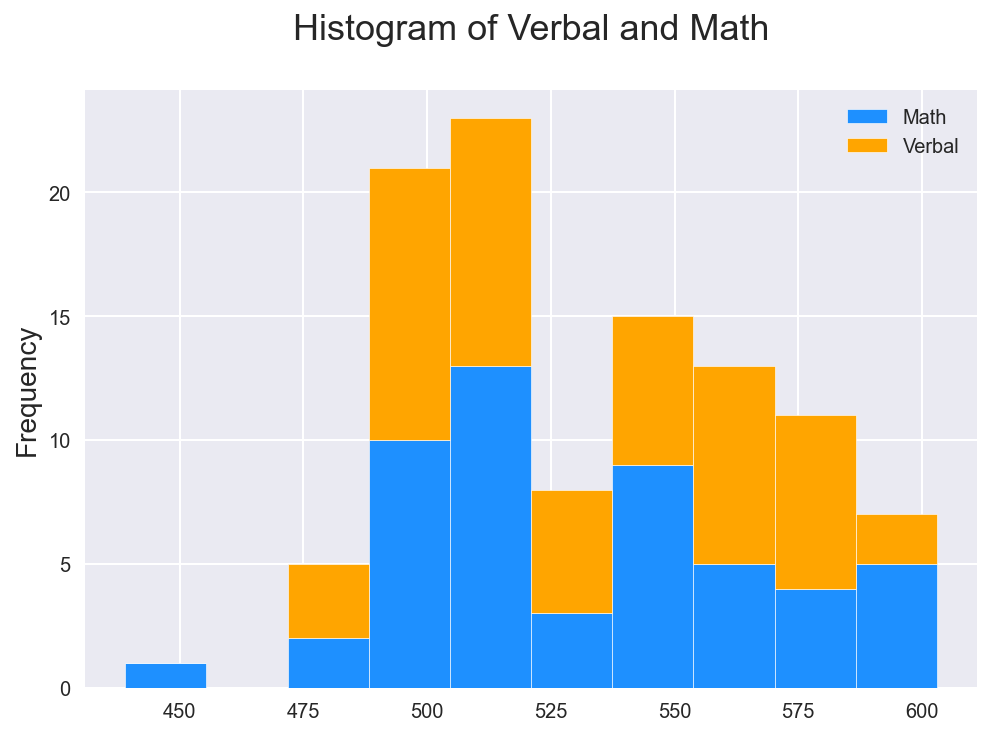

In [23]:
from matplotlib.colors import ListedColormap
colors = ['dodgerblue', 'orange']

sat_scores[['Math', 'Verbal']].plot.hist(stacked=True, bins=10, colormap=ListedColormap(colors))
plt.title('Histogram of Verbal and Math\n', fontsize=18)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

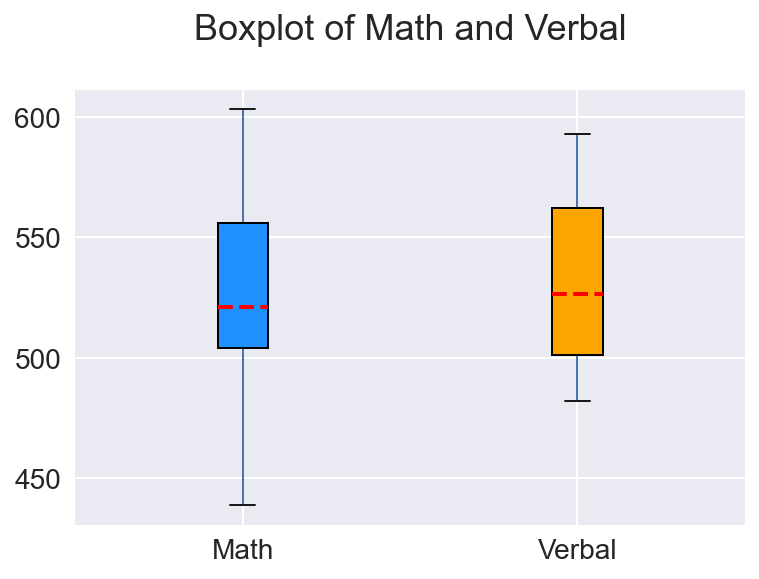

In [24]:
ax = sat_scores.boxplot(column=['Math', 'Verbal'], figsize=(6,4), color={'boxes':'Black', 'medians': 'Red'}, 
                        medianprops={'linestyle': '--', 'linewidth': 2}, return_type='dict', 
                        patch_artist=True, fontsize=14)

for i, box in enumerate(ax['boxes']):
    box.set_facecolor(colors[i])
plt.title('Boxplot of Math and Verbal\n', fontsize=18)
plt.show()

Boxplots are primarly used to compare several distributions against each other. They show easily the five number summary (Min, Q1, Median, Q3, Max). Compared to histograms you can extract the exact positions of the outliers and you see the median and the interquartile range by default. And it's easier to determine the skewness. 
When using the scatterplot instead, you would neither detect the median, IQR, nor the outliers.

The Rate column has different dimensions and it would squeeze the plot if the data aren't normalized.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [25]:
def standarized(x):
    "Returns the z-score"
    return (x-x.mean())/x.std()

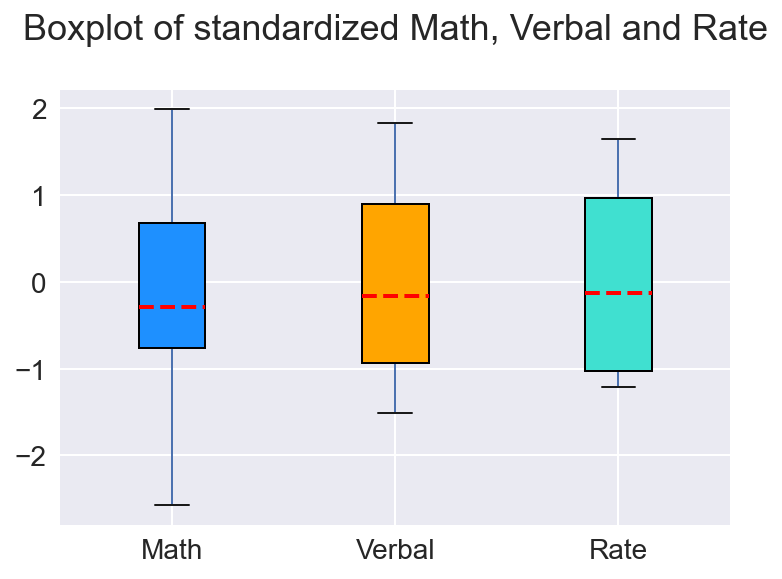

In [26]:
sat_scores_normalized = sat_scores[['Rate', 'Verbal', 'Math']].apply(standarized)
ax = sat_scores_normalized.boxplot(column=['Math', 'Verbal', 'Rate'], 
                                   figsize=(6,4), 
                                   color={'boxes':'Black', 'medians': 'Red'}, 
                                   medianprops={'linestyle': '--', 'linewidth': 2},
                                   return_type='dict',
                                   patch_artist=True,
                                   fontsize=14)

colors.append('turquoise')
for i, box in enumerate(ax['boxes']):
    box.set_facecolor(colors[i])
    
plt.title('Boxplot of standardized Math, Verbal and Rate\n', fontsize=18)
plt.show()

Each column of the dataset was normalised by calculating the z-scores. While each column has now a distribution with the mean of null and a standard deviation of one, they can be used for comparisons.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [27]:
verbal_mean = sat_scores['Verbal'].mean()
print('Verbal mean:', round(verbal_mean))
mask = (sat_scores['Verbal'] >  verbal_mean)
# alphabetically ordered
sat_scores_states_above_verbal_mean = sat_scores[mask][['State', 'Verbal']].sort_values(by=['State'])
sat_scores_states_above_verbal_mean.head()

Verbal mean: 532


,State,Verbal
39,AL,559
45,AR,562
26,CO,539
47,IA,593
30,ID,543


In [28]:
print("%s states have a higher Verbal score than the mean." % sat_scores_states_above_verbal_mean.shape[0])

24 states have a higher Verbal score than the mean.


In [29]:
print('Counts of states:', sat_scores.shape[0])
verbal_median = sat_scores['Verbal'].median()
print('Verbal median:', verbal_median)
print('Verbal distribution skewness:', round(sat_scores[['Verbal']].skew()[0], 4))

Counts of states: 52
Verbal median: 526.5
Verbal distribution skewness: 0.2603


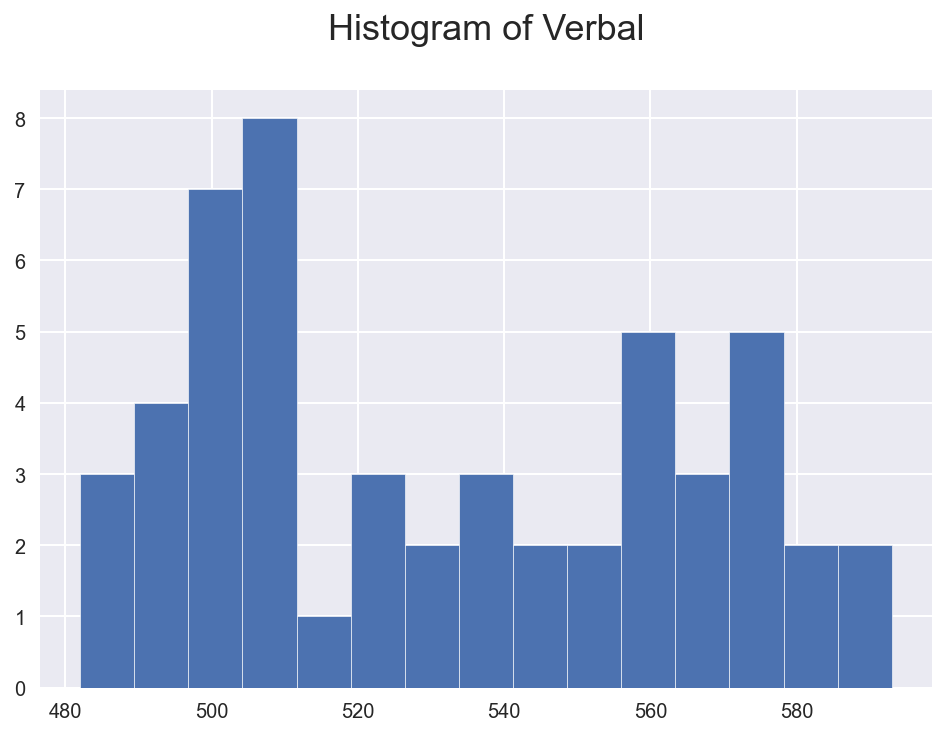

In [30]:
sat_scores['Verbal'].hist(bins=15)
plt.title('Histogram of Verbal\n', fontsize=18)
plt.show()

On half of the states is above and other half is under the mean of the Verbal score. The distribution is positive skewed and multimodal (probably bimodal based on the given plot with 15 bins). 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [31]:
mask = (sat_scores['Verbal'] > verbal_median)
sat_scores_states_above_verbal_median = sat_scores[mask][['State', 'Verbal']].sort_values(by=['State'])
sat_scores_states_above_verbal_median.head()

,State,Verbal
39,AL,559
45,AR,562
26,CO,539
47,IA,593
30,ID,543


In [32]:
print("%s states are above the median Verbal score." % sat_scores_states_above_verbal_median.shape[0])

26 states are above the median Verbal score.


For positive skewed distributions the mean value is greater than the median value.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [33]:
sat_scores['Verbal_Math_diff'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores.head()

,State,Rate,Verbal,Math,Verbal_Math_diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [34]:
mask = (sat_scores['Verbal'] > sat_scores['Math'])  # to be sure that verbal score is greater 
sat_scores_verbal_greater_math = sat_scores[mask].drop(labels=['Rate'], axis=1) \
                                     .sort_values(by=['Verbal_Math_diff'], ascending=False)[:10]
sat_scores_verbal_greater_math

,State,Verbal,Math,Verbal_Math_diff
27,OH,534,439,95
29,WV,527,512,15
50,MS,566,551,15
45,AR,562,550,12
31,TN,562,553,9
9,VA,510,501,9
32,NM,551,542,9
16,DC,482,474,8
41,OK,567,561,6
8,ME,506,500,6


In [35]:
mask = (sat_scores['Verbal'] < sat_scores['Math'])  # to be sure that math score is greater 
sat_scores_math_greater_verbal = sat_scores[mask].drop(labels=['Rate'], axis=1) \
                                     .sort_values(by=['Verbal_Math_diff'], ascending=True)[0:10]
sat_scores_math_greater_verbal

,State,Verbal,Math,Verbal_Math_diff
21,HI,485,515,-30
23,CA,498,517,-19
1,NJ,499,513,-14
33,IL,576,589,-13
44,WI,584,596,-12
36,MI,561,572,-11
3,NY,495,505,-10
47,IA,593,603,-10
37,MN,580,589,-9
51,All,506,514,-8


In [36]:
sat_scores_verbal_greater_math.head(3)

,State,Verbal,Math,Verbal_Math_diff
27,OH,534,439,95
29,WV,527,512,15
50,MS,566,551,15


In [37]:
sat_scores_math_greater_verbal.head(3)

,State,Verbal,Math,Verbal_Math_diff
21,HI,485,515,-30
23,CA,498,517,-19
1,NJ,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [38]:
sat_scores.drop('Verbal_Math_diff', axis=1, inplace=True)
sat_scores[['Rate', 'Verbal', 'Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


Rate and Verbal are strong negative correlated which means that one variable declines while the other increases. Rate and Math are few less negative correlated than the previous variables. The reason for this behaviour is that the best rating score is 1. <br>
Math and Verbal are strong positive related which means that both either increase or decrease together.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [39]:
sat_scores.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


For columns with numerical values:<br>
<b>count</b>: amount of variables<br>
<b>mean</b>: the average value<br>
<b>std</b>: the standard deviation<br>
<b>min</b>: the minimum value<br>
<b>25%</b>: 25th percentile (25% of the values are equal or lower than this value)<br>
<b>50%</b>: median value<br>
<b>75%</b>: 75th percentile<br>
<b>max</b>: the maximum value

In [40]:
sat_scores.describe(include='O')

,State
count,52
unique,52
top,CA
freq,1


For columns with non-numerical values:<br>
<b>count</b>: amount of variables<br>
<b>unique</b>: amount of unique values<br>
<b>top</b>: value which occures the most often<br>
<b>freq</b>: how many times the <b>top</b> value occures

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [41]:
sat_scores[['Rate', 'Verbal', 'Math']].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


$$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X_i - \bar{X})(Y_i - \bar{Y})}{N-1}$$  
...sample coveriance, if the population coveriance is required then only use $N$

$$ \text{Pearson correlation}\;r = {\rm corr}(X, Y) =\frac{{\rm cov}(X, Y)}{{\rm std}(X){\rm std}(Y)}$$

1. Both measure the relationship between two variables, whereas the magnitude of the coveriance to indicate the strength of the relationship is dependent of the dimensions of both variables but the correlation is standardized by the standard deviations which ensures that the correlation between two features is in the range [-1, 1], which leads to more interpretability.


2. To convert the covariance matrix into a correlation matrix it has to be normalized by the two standard deviations of both variables. This process bounds the output of the correlation into an interval of [-1, 1], with -1 for a perfect negative and +1 for a perfect positive correlation.


3. The range of [-1, 1] lets us easily detect the strength of the relationship. It is also a unit-free measure whereas the covariance matrix has the unit of the product of the two variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [42]:
drug_use_by_age_csv = "./drug-use-by-age.csv"  # os.path.dirname(os.getcwd()) + "/EDA/drug-use-by-age.csv"
drug = pd.read_csv(drug_use_by_age_csv)

In [43]:
drug.shape

(17, 28)

In [44]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [45]:
import string

# clean column names by removing none alphabetic characters or 
# by separating multiple names with underscores

drug.columns = [('').join([letter.lower() 
                           if letter in string.ascii_letters 
                           else '_' if i!=0 and not i == len(col)-1 
                           else '' for i, letter in enumerate(col)]) 
                for col in drug.columns]
drug.columns

Index(['age', 'n', 'alcohol_use', 'alcohol_frequency', 'marijuana_use',
       'marijuana_frequency', 'cocaine_use', 'cocaine_frequency', 'crack_use',
       'crack_frequency', 'heroin_use', 'heroin_frequency', 'hallucinogen_use',
       'hallucinogen_frequency', 'inhalant_use', 'inhalant_frequency',
       'pain_releiver_use', 'pain_releiver_frequency', 'oxycontin_use',
       'oxycontin_frequency', 'tranquilizer_use', 'tranquilizer_frequency',
       'stimulant_use', 'stimulant_frequency', 'meth_use', 'meth_frequency',
       'sedative_use', 'sedative_frequency'],
      dtype='object')

In [46]:
drug.head()

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [47]:
drug.tail()

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [48]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol_use              17 non-null     float64
 3   alcohol_frequency        17 non-null     float64
 4   marijuana_use            17 non-null     float64
 5   marijuana_frequency      17 non-null     float64
 6   cocaine_use              17 non-null     float64
 7   cocaine_frequency        17 non-null     object 
 8   crack_use                17 non-null     float64
 9   crack_frequency          17 non-null     object 
 10  heroin_use               17 non-null     float64
 11  heroin_frequency         17 non-null     object 
 12  hallucinogen_use         17 non-null     float64
 13  hallucinogen_frequency   17 non-null     float64
 14  inhalant_use             17 

In [49]:
drug.iloc[:, :15].describe()

,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,crack_use,heroin_use,hallucinogen_use,hallucinogen_frequency,inhalant_use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,1.388235
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,0.927283
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,0.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,0.600000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,1.400000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,2.000000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,3.000000


In [50]:
drug.iloc[:,15:].describe()

,pain_releiver_use,pain_releiver_frequency,oxycontin_use,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,sedative_use,sedative_frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [51]:
# the stimulant frequency is showing a skewed distribution with a high standard deviation 
# which occurs due to an outlier

stimulant_frequency_75perc = np.quantile(drug['stimulant_frequency'], 0.75)
print(stimulant_frequency_75perc)
drug[drug['stimulant_frequency'] > stimulant_frequency_75perc][['stimulant_frequency']]

12.0


,stimulant_frequency
14,24.0
15,24.0
16,364.0


In [52]:
# drug.loc[16, 'stimulant_frequency'] = 34.0
pd.set_option('display.max_columns', 28)
drug.tail(1)

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,heroin_frequency,hallucinogen_use,hallucinogen_frequency,inhalant_use,inhalant_frequency,pain_releiver_use,pain_releiver_frequency,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,0.0,120.0,0.1,2.0,0.0,-,0.6,24.0,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [53]:
drug.drop(drug.index[16], inplace=True)  # drug.drop(drug.index[-1], inplace=True)
drug.describe(include='O')

,age,cocaine_frequency,crack_frequency,heroin_frequency,inhalant_frequency,oxycontin_frequency,meth_frequency
count,16,16,16,16,16,16,16
unique,16,9,13,16,10,14,14
top,14,5.0,5.0,46.0,4.0,12.0,12.0
freq,1,6,2,1,5,2,2


In [54]:
for col in drug.describe(include='O').columns:
    print("""
    Column name: {col}
    Unique values: {val}
    """.format(col=col, val=drug[col].unique()))


    Column name: age
    Unique values: ['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64']
    

    Column name: cocaine_frequency
    Unique values: ['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0']
    

    Column name: crack_frequency
    Unique values: ['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0'
 '48.0' '62.0']
    

    Column name: heroin_frequency
    Unique values: ['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0']
    

    Column name: inhalant_frequency
    Unique values: ['19.0' '12.0' '5.0' '5.5' '3.0' '4.0' '2.0' '3.5' '10.0' '13.5']
    

    Column name: oxycontin_frequency
    Unique values: ['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '46.0' '5.0']
    

    Column name: meth_frequency
    Unique values: ['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.

In [55]:
def convert_to_float(x):
    "Return value converted to numeric float value or nan"
    try:
        return float(x)
    except:
        return np.nan

In [56]:
for i, col in enumerate(drug.describe(include='O').columns):
    if i > 0:
        drug[col] = drug[col].map(convert_to_float)

In [57]:
drug.dtypes

age                         object
n                            int64
alcohol_use                float64
alcohol_frequency          float64
marijuana_use              float64
marijuana_frequency        float64
cocaine_use                float64
cocaine_frequency          float64
crack_use                  float64
crack_frequency            float64
heroin_use                 float64
heroin_frequency           float64
hallucinogen_use           float64
hallucinogen_frequency     float64
inhalant_use               float64
inhalant_frequency         float64
pain_releiver_use          float64
pain_releiver_frequency    float64
oxycontin_use              float64
oxycontin_frequency        float64
tranquilizer_use           float64
tranquilizer_frequency     float64
stimulant_use              float64
stimulant_frequency        float64
meth_use                   float64
meth_frequency             float64
sedative_use               float64
sedative_frequency         float64
dtype: object

In [58]:
drug.isnull().sum()

age                        0
n                          0
alcohol_use                0
alcohol_frequency          0
marijuana_use              0
marijuana_frequency        0
cocaine_use                0
cocaine_frequency          0
crack_use                  0
crack_frequency            2
heroin_use                 0
heroin_frequency           1
hallucinogen_use           0
hallucinogen_frequency     0
inhalant_use               0
inhalant_frequency         0
pain_releiver_use          0
pain_releiver_frequency    0
oxycontin_use              0
oxycontin_frequency        0
tranquilizer_use           0
tranquilizer_frequency     0
stimulant_use              0
stimulant_frequency        0
meth_use                   0
meth_frequency             1
sedative_use               0
sedative_frequency         0
dtype: int64

#### Missing values

Some data were missing and conveyed as a hyphen. Due to the relation of some sections of the data it turned out that no complicated imputation was necessary and they could be replaced with null.

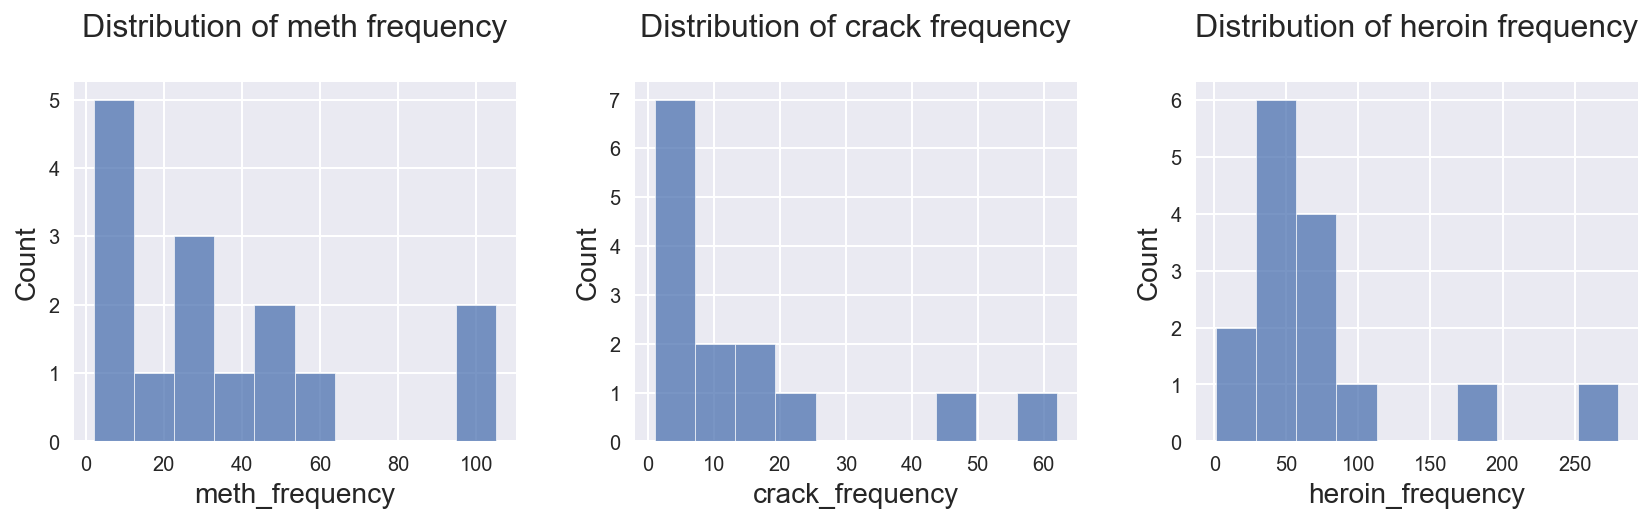

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.histplot(data=drug, x='meth_frequency', bins=10, ax=ax[0])
sns.histplot(data=drug, x='crack_frequency', bins=10, ax=ax[1])
sns.histplot(data=drug, x='heroin_frequency', bins=10, ax=ax[2])
ax[0].set_title('Distribution of meth frequency\n', fontsize=16)
ax[1].set_title('Distribution of crack frequency\n', fontsize=16)
ax[2].set_title('Distribution of heroin frequency\n', fontsize=16)
plt.tight_layout()
plt.show()

In [60]:
meth_nan_idx = np.where(pd.isna(drug['meth_frequency']))[0]
meth_nan_idx

array([0])

In [61]:
drug['meth_use'].iloc[0]

0.0

In [62]:
# the meth use of this participant is inexistent and therefore the frequency is null

drug['meth_frequency'].fillna(meth_nan_idx[0], inplace=True)

In [63]:
crack_nan_idx = np.where(pd.isna(drug['crack_frequency']))[0]
crack_nan_idx

array([0, 2])

In [64]:
drug['crack_use'].iloc[[0,2]]

0    0.0
2    0.0
Name: crack_use, dtype: float64

In [65]:
# meth use of both partipant is null, accordingly the frequency is null 

drug['crack_frequency'].fillna(0.0, inplace=True)

In [66]:
heroin_nan_idx = np.where(pd.isna(drug['heroin_frequency']))[0]
heroin_nan_idx

array([1])

In [67]:
drug['heroin_use'].iloc[heroin_nan_idx]

1    0.0
Name: heroin_use, dtype: float64

In [68]:
# meth use is null -> frequency has to be null

drug['heroin_frequency'].fillna(0.0, inplace=True)

In [69]:
drug.isnull().sum().sum()

0

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

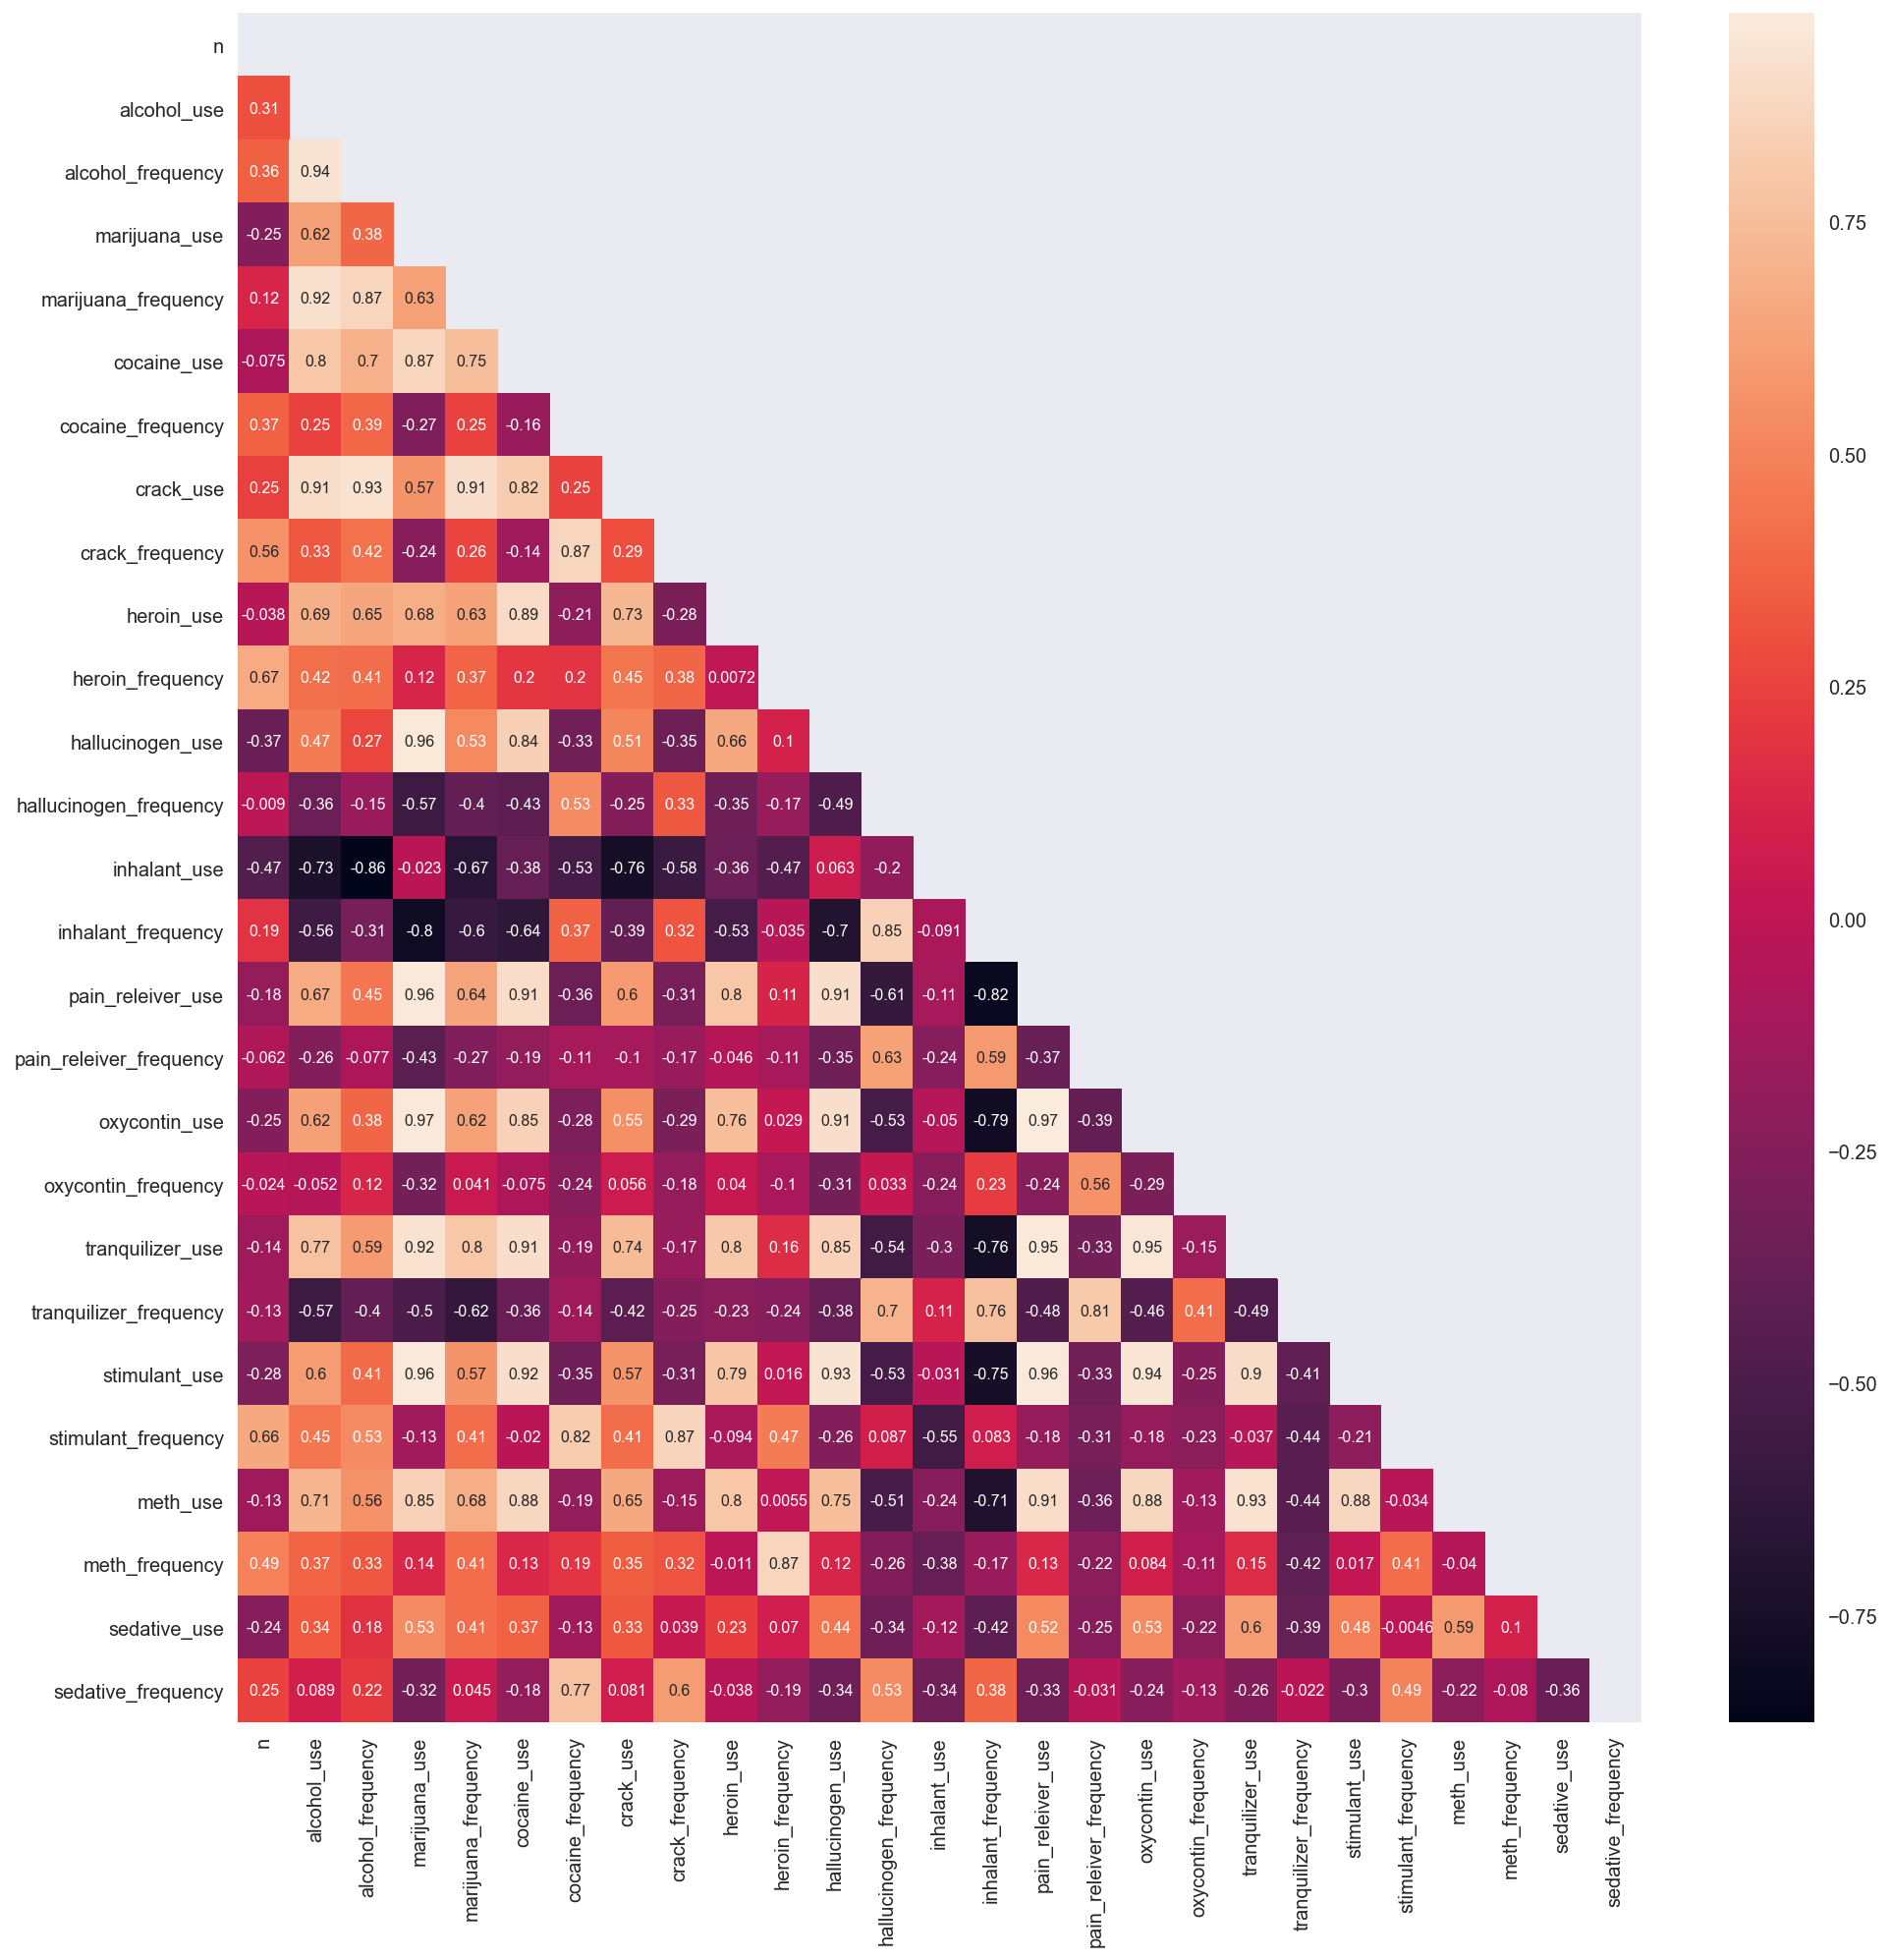

In [70]:
# correlation plot

plt.figure(figsize=(16, 16))

# generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(drug.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(drug.corr(), mask=mask, annot=True, annot_kws={'fontsize': 8})

plt.show()

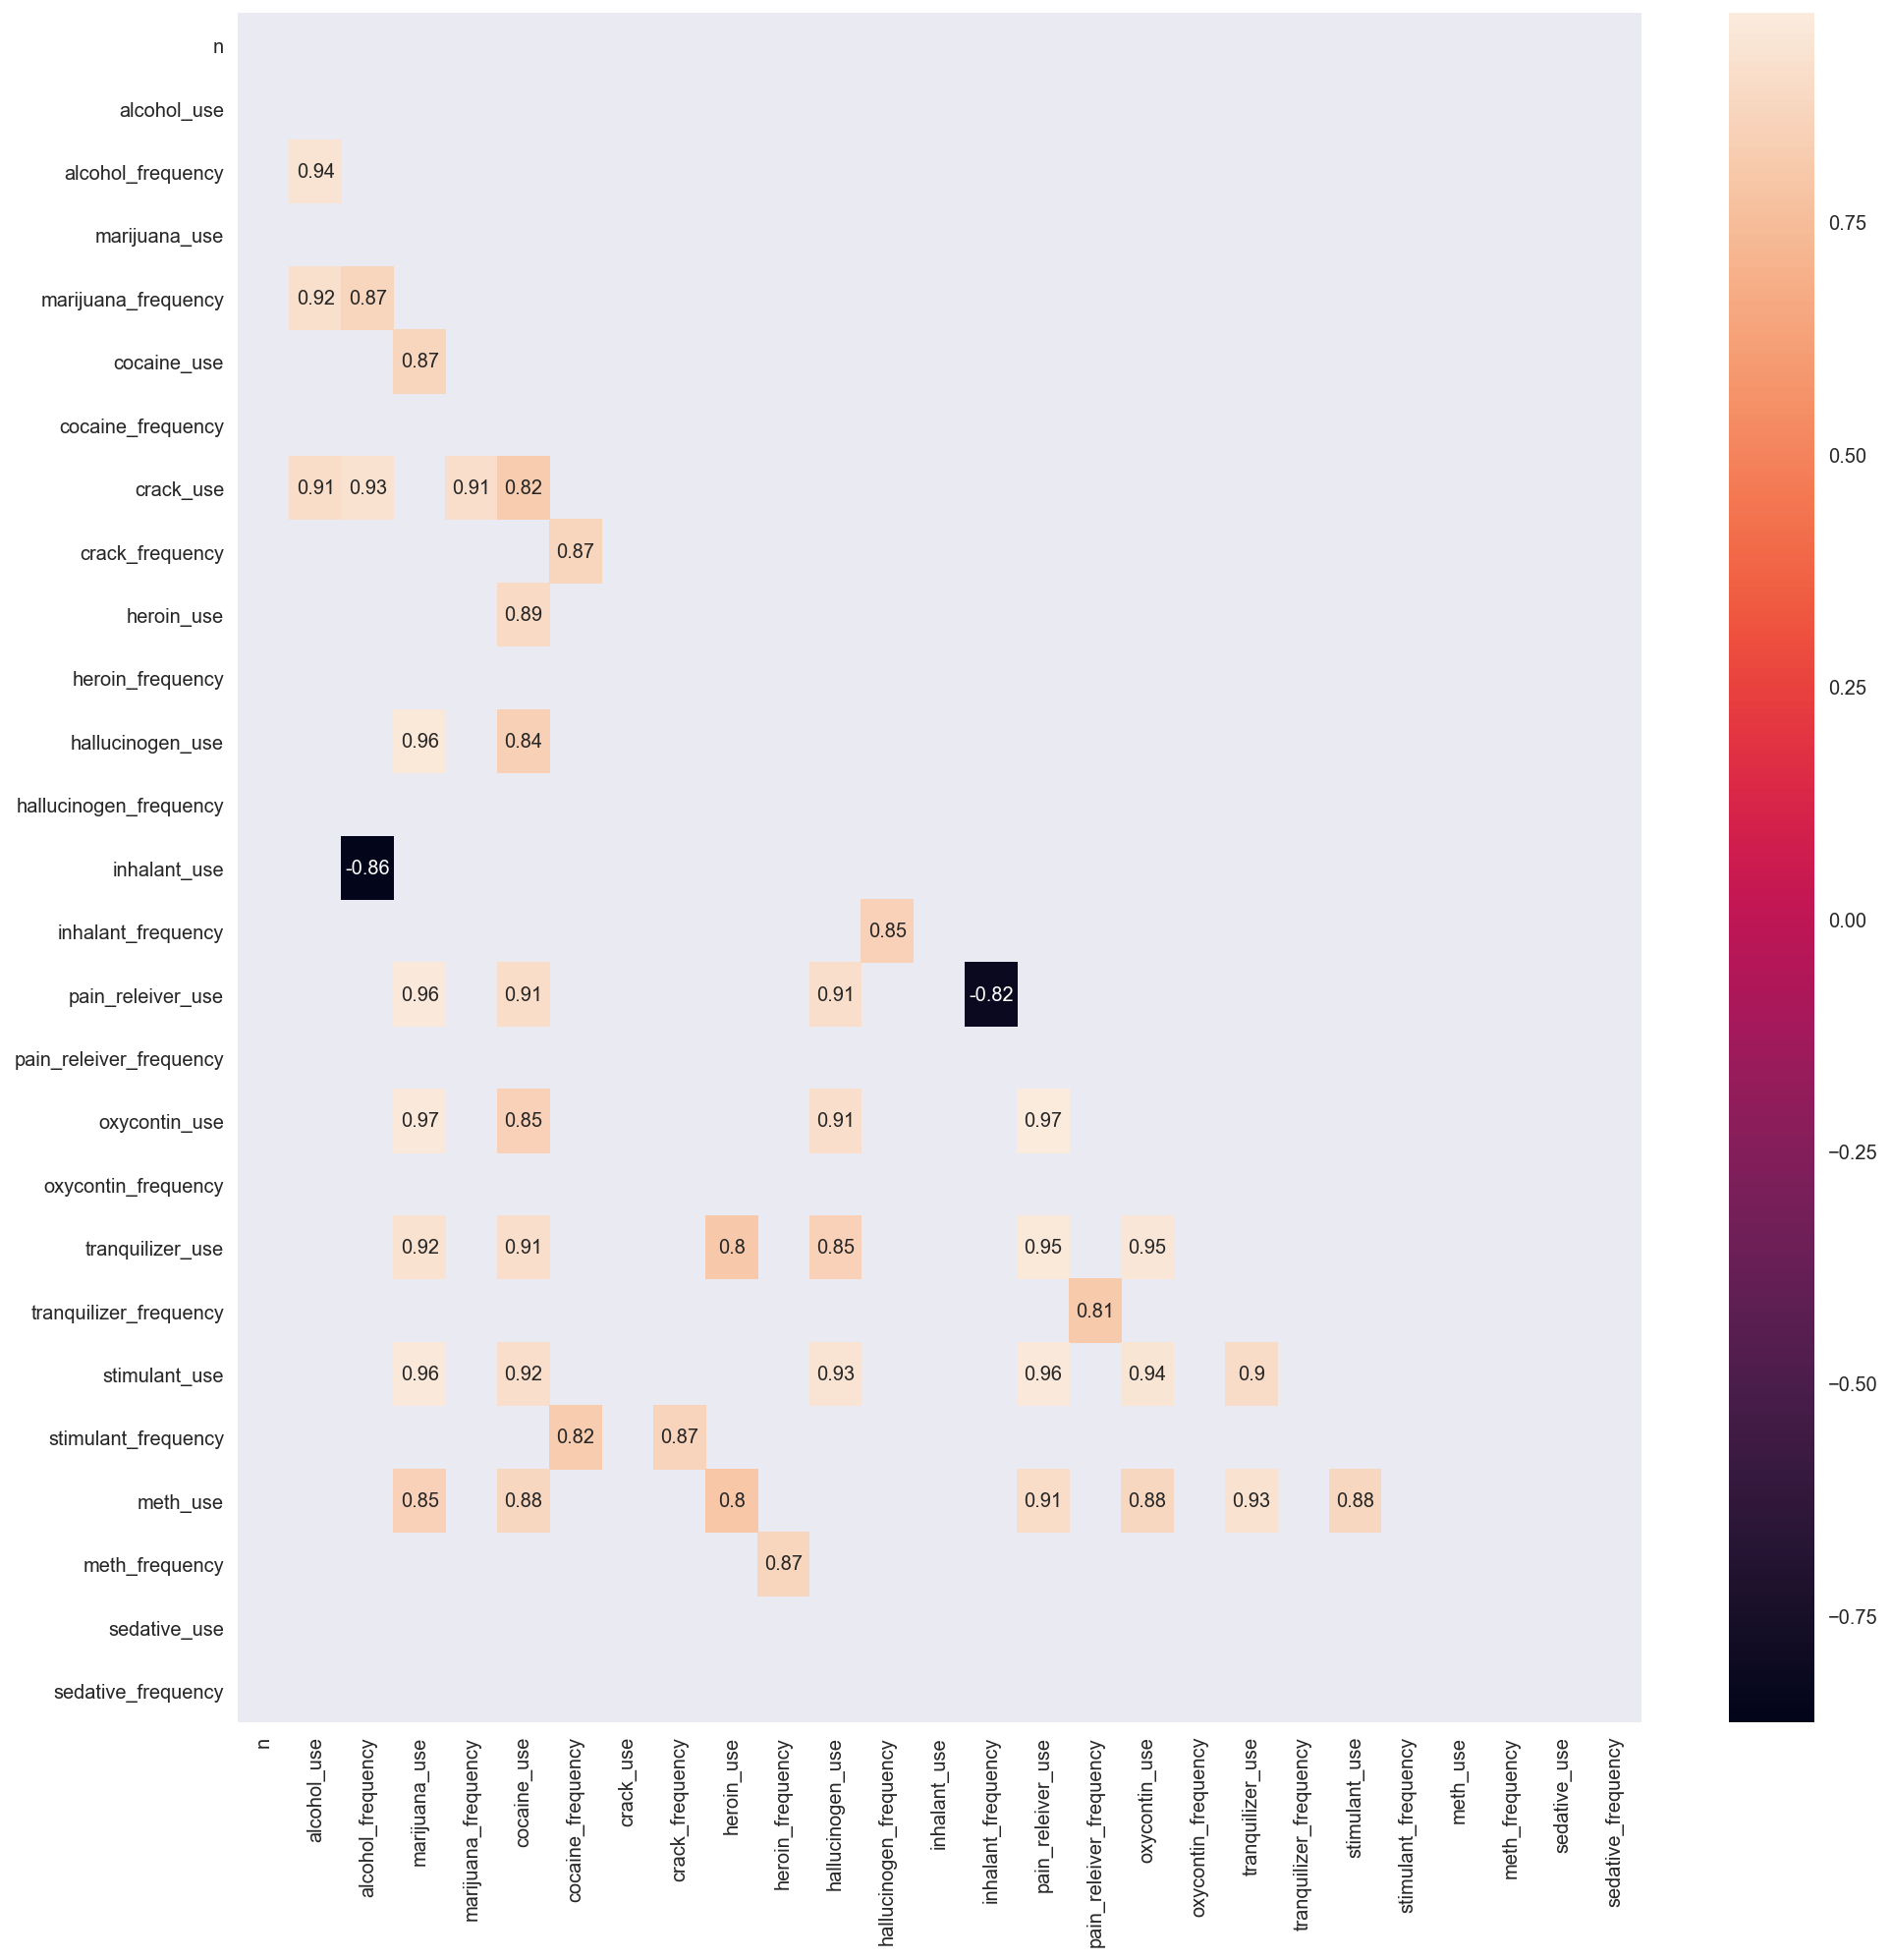

In [71]:
# showing only strong correlations
plt.figure(figsize=(16,16))
sns.heatmap(drug.corr()[(abs(drug.corr()) >= 0.8)], mask=mask, 
            annot=True, annot_kws={'fontsize': 10})
plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

# standardized data
drug_std = pd.DataFrame(scaler.fit_transform(drug.drop(['n', 'age'], axis=1)), 
                                             columns=drug.drop(['n', 'age'], axis=1).columns)

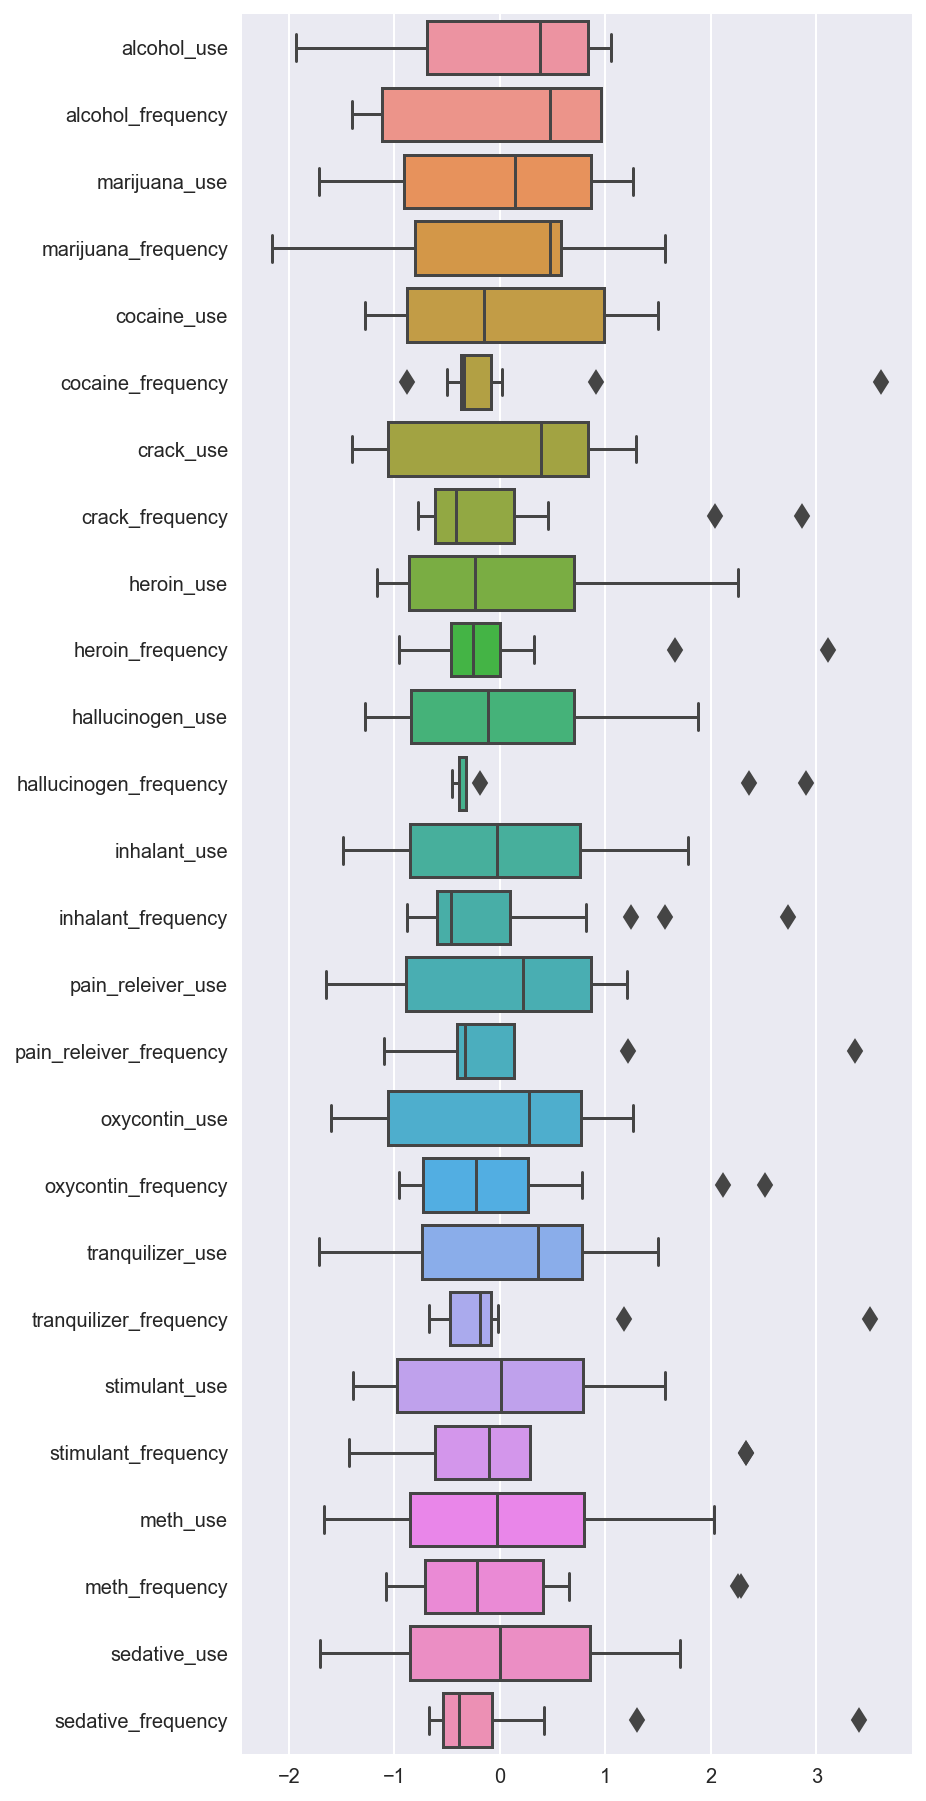

In [74]:
# showing the distributions of all features as boxplots

fig, ax = plt.subplots(figsize=(6, 16))

# standardized data
sns.boxplot(data=drug_std, orient='h',
            fliersize=8, linewidth=1.5, notch=False,
            saturation=0.8, whis=1.5, ax=ax)

plt.show()

In [75]:
drug_col_use = drug.columns[drug.columns.str.contains('use')]
drug[drug_col_use].apply(lambda x: x != 0).sum().sort_values(ascending=False)

sedative_use         16
stimulant_use        16
tranquilizer_use     16
oxycontin_use        16
pain_releiver_use    16
inhalant_use         16
hallucinogen_use     16
cocaine_use          16
marijuana_use        16
alcohol_use          16
meth_use             15
heroin_use           15
crack_use            12
dtype: int64

In [76]:
# data type of the age feature is object, but they are ordered already in ascending order 
# therefore they don't need to be converted to numerical values first
print(drug['age'].values)

['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64']


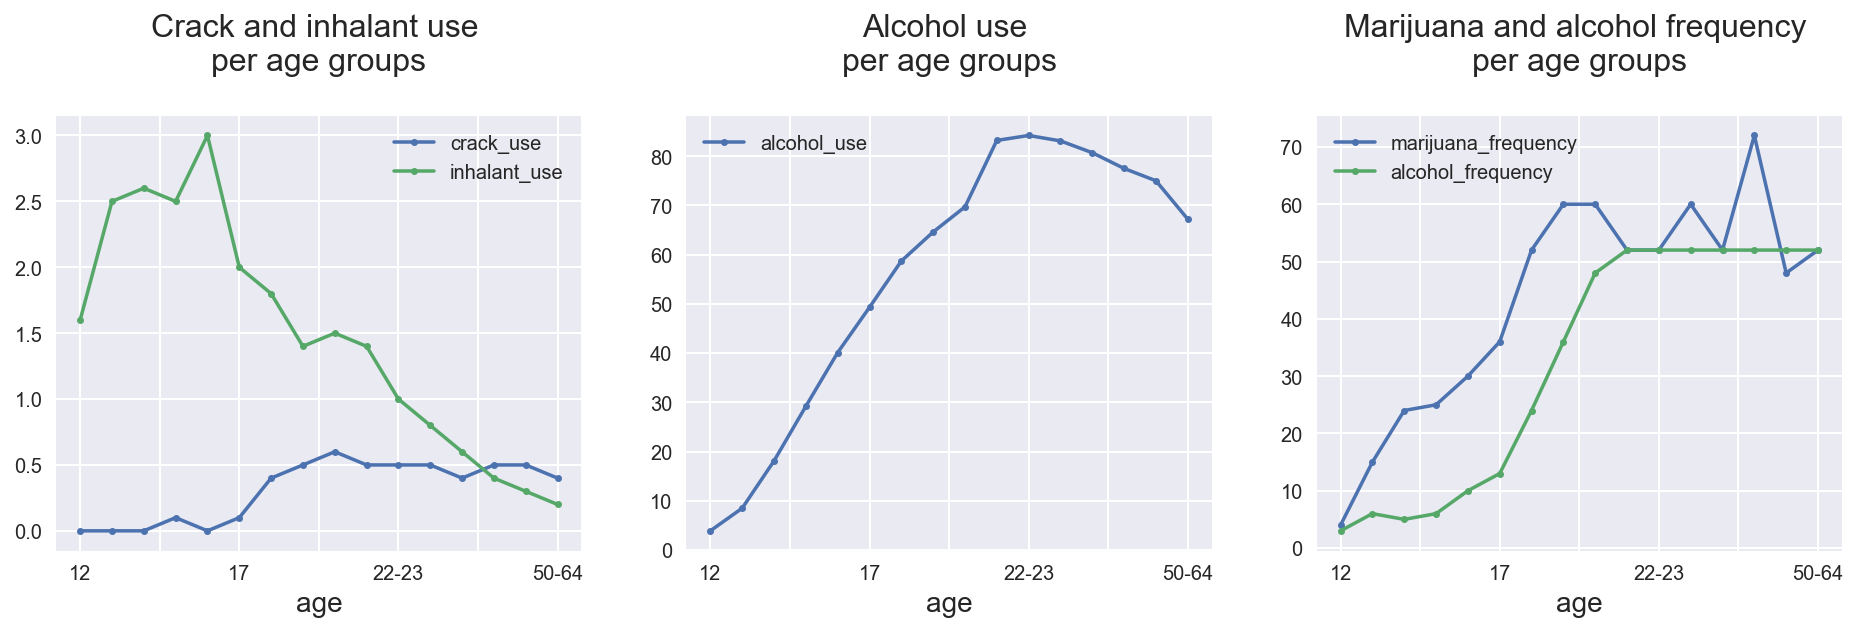

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(16,4))

drug.plot('age', ['crack_use', 'inhalant_use'], style='.-', ax=ax[0])
ax[0].set_title('Crack and inhalant use \nper age groups\n', fontsize=16)

drug.plot('age', 'alcohol_use', style='.-', ax=ax[1])
ax[1].set_title('Alcohol use \nper age groups\n', fontsize=16);

drug.plot('age', ['marijuana_frequency', 'alcohol_frequency'], style='.-', ax=ax[2])
ax[2].set_title('Marijuana and alcohol frequency \nper age groups\n', fontsize=16)
plt.show()

Inference:<br>
The drugs with the highest correlation to the age of the candidates are marijuna, alcohol, crack and inhalants. Whereas the consumption of each drug of that list increases with the age only the inhalants have their peak in very early age and decrease while getting older. The other drugs have their peak more or less around the age of 21.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

1) Null Hypothesis: Drug consumption is not related to the age of the candidates.

2) Calculating the correlation matrix and detect the direction and strength of the relationships of the individual drugs and the age parameter. After gaining the result try to state inferences why the relationship is given or not. If the null hypothesis is wrong try to divide the ages in useful groups and find the causality for the impact. What are the differences between these groups which could lead to the given result.

3) See result above (also inference). 

In [78]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [79]:
def find_outliers(df, col):
    """Return and print outliers
    
    Parameters:
    df (DataFrame): dataframe
    col (str): name of the column
    
    Returns:
    lower_outlier (pandas.Series): list of all lower outliers
    upper_outlier (pandas.Series): list of all upper outliers
    """
    mean_val = df[col].mean()
    std_val = df[col].std()
    
    mask_lower = (df[col] < mean_val - 3 * std_val)
    mask_upper = (df[col] > mean_val + 3 * std_val)
    
    lower_outlier = df[col][mask_lower]
    upper_outlier = df[col][mask_upper]
    print("In {col} are {amount} lower outliers: {lower_outliers}".format(col=col, amount=len(lower_outlier), lower_outliers=[v for v in lower_outlier]))
    print("In {col} are {amount} upper outliers: {upper_outliers}".format(col=col, amount=len(upper_outlier), upper_outliers=[v for v in upper_outlier]))
    
    return lower_outlier, upper_outlier

In [80]:
find_outliers(sat_scores, 'Rate')

In Rate are 0 lower outliers: []
In Rate are 0 upper outliers: []


(Series([], Name: Rate, dtype: int32), Series([], Name: Rate, dtype: int32))

2)<br>
1. Method
$$outlier_{lower}=Q_{1}-1.5*IQR$$
$$outlier_{upper}=Q_{3}-1.5*IQR$$
2. Method
$$outlier_{lower}=mean-3*std$$
$$outlier_{upper}=mean+3*std$$

The plot below indicates that the participant with the worst math score seems to be an outlier even if the numerical defination of outliers from above isn't applied. 

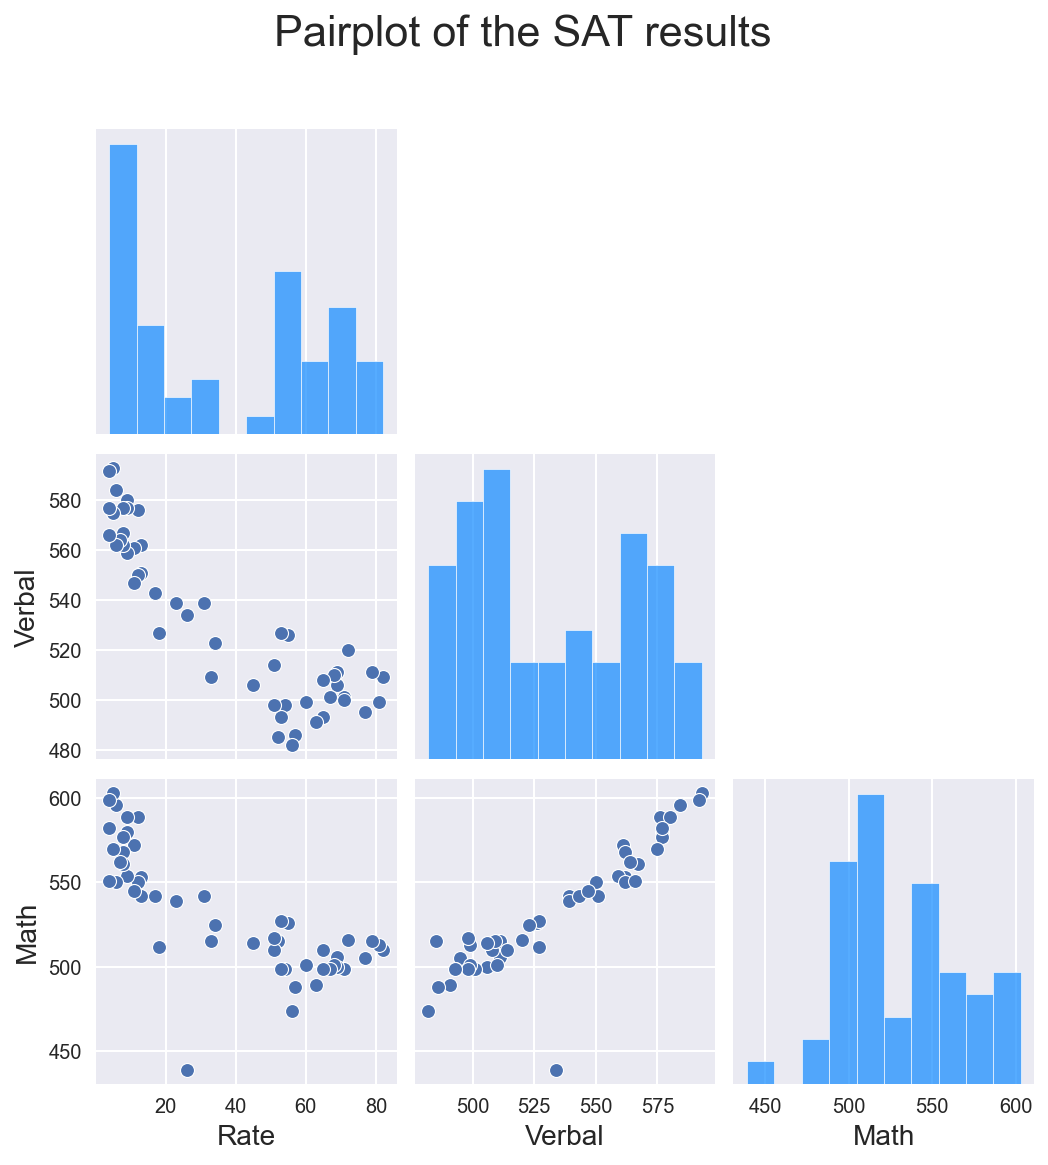

In [86]:
g = sns.pairplot(sat_scores, corner=True, diag_kws={'bins': 10, 'color': 'dodgerblue'})
g.fig.suptitle('Pairplot of the SAT results', y=1.08)
plt.show()

In [93]:
# candidate with worst math score seems to be an outlier
outlier_idx = sat_scores['Math'].sort_values().index[0]
outlier_idx

27

In [87]:
mean_val = sat_scores['Math'].mean()
std_val = sat_scores['Math'].std()
median_val = sat_scores['Math'].median()
    
z_value = (sat_scores.loc[outlier_idx, 'Math'] - mean_val)/std_val
z_value
# This value is not by definition an outlier, but the z-score is close to the limit of it.

-2.5683760642913995

In [94]:
sat_scores.drop(sat_scores.index[27], inplace=True)

In [95]:
mean_val_cleaned = sat_scores['Math'].mean()
std_val_cleaned = sat_scores['Math'].std()
median_val_cleaned = sat_scores['Math'].median()

print(f'Median - before: {median_val} | cleaned: {median_val_cleaned}')
print(f'Standard deviation - before: {round(std_val, 2)} | cleaned: {round(std_val_cleaned, 2)}')
print(f'Mean - before: {mean_val} | cleaned: {round(mean_val_cleaned, 2)}')

Median - before: 521.0 | cleaned: 525.0
Standard deviation - before: 36.01 | cleaned: 33.89
Mean - before: 531.5 | cleaned: 533.31


#### Compare median, mean and standard deviation of the cleaned data

1) The median value takes the next greater value (if length of the sequence is odd, else the average), because one outlier was dropped.<br>
2) Standard deviation is smaller when the dataframe is cleaned, because outliers stretch the range.<br>
3) The outlier was a lower outlier and therefore the mean value increases after cleaning the dataframe, because a smaller value was dropped.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


#### Spearman correlation

1. Spearman correlation with distinct ranks:

$$ r = 1-\frac{6\sum_{i}d^{2}_{i}}{n(n^2-1)}$$

d... difference of the ranks of two variables for each row<br>
n... amount of numbers per column

rank: labelling the values with numbers (ranks) from 1 for the highest value in ordered sequence up to the highest rank for the smallest value

2. Spearman correlation with tied rank:

$$ r = \frac{\sum_{i}(x_i - \bar{x})(y - \bar{y}_i)}{\sqrt{\sum_{i}(x_i - \bar{x})^2\sum_{i}(y_i - \bar{y})^2}}$$

"While Pearson's correlation assesses linear relationships, SPearman's correlation assesses monotonic relationships ([wiki](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient))." A monotonic function is a function which is either entirely non-increasing or non-decreasing and a linear function is expressed as
$$ f(x) = mx + b $$


The Spearman correlation can therefore also be used to evaluate relationships involving ordinal (categorical) variables.

In [96]:
sat_scores.corr(method='spearman')

,Rate,Verbal,Math
Rate,1.000000,-0.823736,-0.840034
Verbal,-0.823736,1.000000,0.936306
Math,-0.840034,0.936306,1.000000


$$ \text{Pearson correlation}\;r = {\rm corr}(X, Y) =\frac{{\rm cov}(X, Y)}{{\rm std}(X){\rm std}(Y)}$$

In [97]:
sat_scores.corr(method='pearson')

,Rate,Verbal,Math
Rate,1.000000,-0.887459,-0.854382
Verbal,-0.887459,1.000000,0.969126
Math,-0.854382,0.969126,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [98]:
from scipy import stats

sat_scores['Rate_Percentile'] = sat_scores['Rate'].apply(lambda x: stats.percentileofscore(sat_scores['Rate'], x))
sat_scores.head()

,State,Rate,Verbal,Math,Rate_Percentile
0,CT,82,509,510,100.000000
1,NJ,81,499,513,98.039216
2,MA,79,511,515,96.078431
3,NY,77,495,505,94.117647
4,NH,72,520,516,92.156863


In [103]:
sat_scores[sat_scores['State'] == 'CA'][['State', 'Rate_Percentile']]

,State,Rate_Percentile
23,CA,55.882353


Percentile is related to the rank in the manner of that the values are sorted and allocated to a new value based on their position of the ordered sequence. Rank as label from 1 for the highest value up to a number for the lowest value. The percentile score is set to 100 (percent) for the highest value up to a proportion of percentage for the lowest value.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

With the 25th and the 75th percentile the interquartile range can be calculated which is used to detect outliers (see formulas above).

Percentile Capping (Winsorization) is another method of handling outliers, by replacing values less than the value at 1st percentile by the value at the 1st percentile and consequently the same approach for values above the 99th percentile. Another common interval includes the 5th and 95th percentiles.

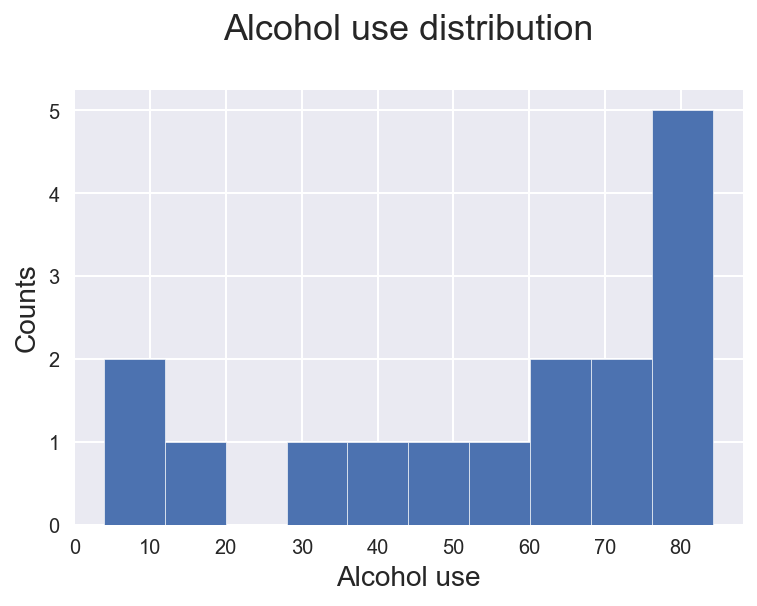

In [111]:
ages = [age for age in drug['age']]

fig, ax = plt.subplots(figsize=(6,4))
drug['alcohol_use'].hist(ax=ax, bins=10);
ax.set_title('Alcohol use distribution\n', fontsize=18)
ax.set_xlabel('Alcohol use', fontsize=14)
ax.set_ylabel('Counts', fontsize=14);


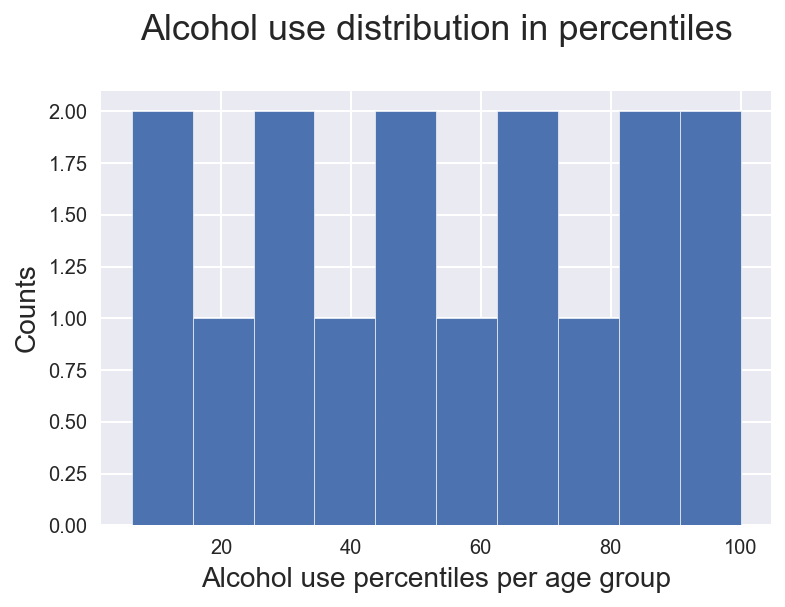

In [116]:
drug['alcohol_use_percentile'] = drug['alcohol_use'].apply(lambda x: stats.percentileofscore(drug['alcohol_use'], x))

fig, ax = plt.subplots(figsize=(6,4))
drug['alcohol_use_percentile'].hist(ax=ax);
ax.set_title('Alcohol use distribution in percentiles\n', fontsize=18)
ax.set_xlabel('Alcohol use percentiles per age group', fontsize=14)
ax.set_ylabel('Counts', fontsize=14);

In [120]:
drug[['alcohol_use', 'alcohol_use_percentile']].sort_values(by=['alcohol_use'], ascending=False)

,alcohol_use,alcohol_use_percentile
10,84.2,100.00
9,83.2,93.75
11,83.1,87.50
12,80.7,81.25
13,77.5,75.00
14,75.0,68.75
8,69.7,62.50
15,67.2,56.25
7,64.6,50.00
6,58.7,43.75


- Percentile score:

Percentile interval are divided in steps of 6.25% which stems from 
$$step=100/len(column)$$
The plots are displayed with 10 bins which means that the features are allocated in 10 groups with equal distance. Percentiles are evenly allocated, but raw data is continouesly distributed. The distribution of the raw data shows that some bins include more observations because data in specific areas are more close together. Especially, a few particapants have a strong alcohol abuse to the same extent.